# Linear Regression

## Load Dataset from sklearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Boston_house.csv")
df.tail()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0
505,80.8,396.90,6.030,0.04741,2.5050,11.93,7.88,0.573,21.0,1,0.0,273,0,11.9


In [ ]:
cols = ["Target",  "RM", "LSTAT"]

In [ ]:
df[cols].describe()

,Target,RM,LSTAT
count,506.000000,506.000000,506.000000
mean,22.532806,6.284634,12.653063
std,9.197104,0.702617,7.141062
min,5.000000,3.561000,1.730000
25%,17.025000,5.885500,6.950000
50%,21.200000,6.208500,11.360000
75%,25.000000,6.623500,16.955000
max,50.000000,8.780000,37.970000


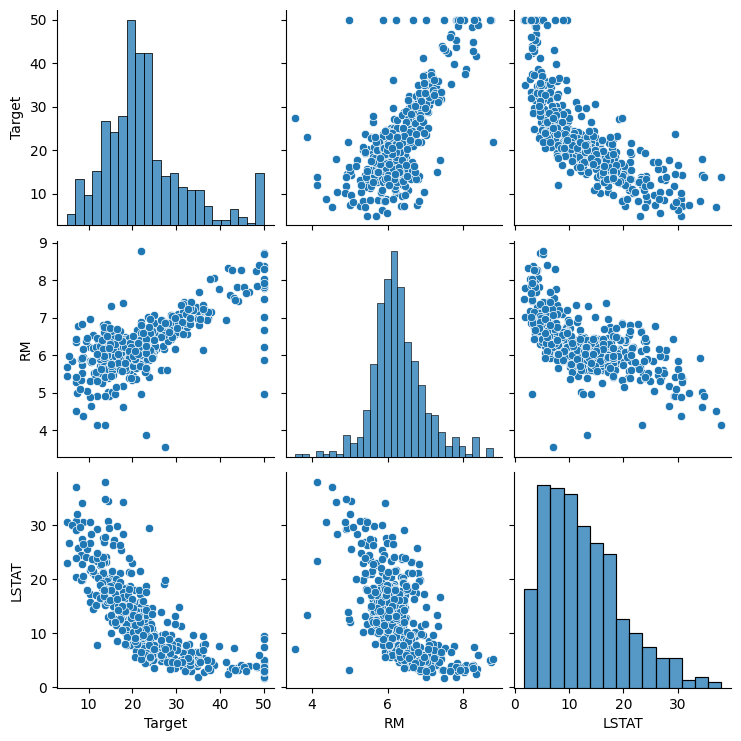

In [ ]:
sns.pairplot(df[cols])
plt.show()

## Train Linear Model with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([506, 3])

In [ ]:
# Split x and y.
y = data[:, :1]
x = data[:, 1:]

print(x.shape, y.shape)

torch.Size([506, 2]) torch.Size([506, 1])


In [ ]:
# Define configurations.
n_epochs = 200
learning_rate = 1e-3
print_interval = 10

In [ ]:
# Define model.
model = nn.Linear(x.size(-1), y.size(-1))

model

Linear(in_features=2, out_features=1, bias=True)

In [ ]:
# Instead of implement gradient equation,
# we can use <optim class> to update model parameters, automatically.
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [ ]:
# Whole training samples are used in 1 epoch.
# Thus, "N epochs" means that model saw a sample N-times.
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 10: loss=2.3828e+02
Epoch 20: loss=1.6385e+02
Epoch 30: loss=1.1609e+02
Epoch 40: loss=8.5437e+01
Epoch 50: loss=6.5768e+01
Epoch 60: loss=5.3146e+01
Epoch 70: loss=4.5047e+01
Epoch 80: loss=3.9849e+01
Epoch 90: loss=3.6513e+01
Epoch 100: loss=3.4373e+01
Epoch 110: loss=3.2999e+01
Epoch 120: loss=3.2118e+01
Epoch 130: loss=3.1552e+01
Epoch 140: loss=3.1189e+01
Epoch 150: loss=3.0956e+01
Epoch 160: loss=3.0807e+01
Epoch 170: loss=3.0711e+01
Epoch 180: loss=3.0649e+01
Epoch 190: loss=3.0610e+01
Epoch 200: loss=3.0584e+01


## Let's see the result!

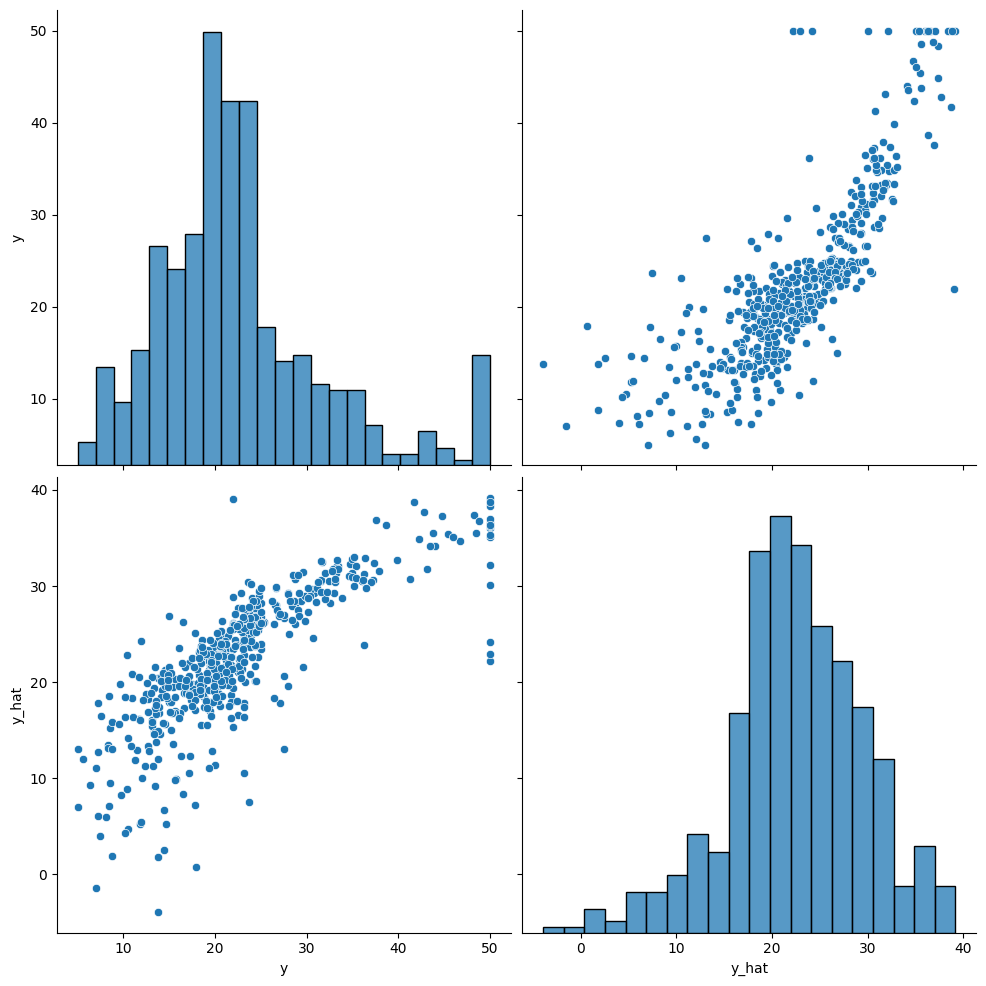

In [ ]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()